# Research assignment 4


Justin Barnes

3/11/24

## 1. Develop hypotheses about interactions between your independent variables [1 pt]

You can use the GSS data, Student aid data, or your own data

    A. Write at least one hypothesis involving one of the two following types of interactions
        1) nominal * nominal
        2) nominal * interval-ratio
    
## For this assignment, I am interested in the relationship between education, political leaning, age (IVs) and support for increased environmental spending (DV).

## H1: Within the standard model, I expect that support for environmental spending will be:
- positively associated with education
- greater for left-leaning respondents in comparison to other political categories
- lower for older respondents.

    B. State the predicted direction of association between your dependent variable and:
        1) each of the 2 independent variables by themselves
        
## H1a: Age will have a weak but negative association with support for environmental spending
## H1b: Left-leaning respondents will generally be more supportive of environmental spending than right-leaning respondents
        2) the interaction of the 2 indendent variables
## H1i: Younger generations of right-leaning respondents will have different levels of support for environmental spending than other age groups, more similar to left-leaning respondents. 

        3) you can predict that there is no association
        
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each of your predictions
    
## According to Lim (2020), "environmental issues pose an ideological risk to conservatives" and "conservatives are negatively associated with attitudes to environmental spending...". With that in mind, I would expect right-leaning respondents to trend lower on my IV; however, research into my own interests have suggested that younger people may be more concerned in general, so I think this will impact their results. 

In [1]:
use natenvir educ age race partyid using GSS2018.dta, replace

In [2]:
%head

,age,educ,race,partyid,natenvir
1,,,white,not very strong republican,about right
2,,,white,"independent, close to democrat",iap
3,,,white,"independent, close to republican",too little
4,,,white,"independent, close to democrat",iap
5,,,black,strong republican,iap


In [3]:
codebook natenvir


-------------------------------------------------------------------------------
natenvir                                     improving & protecting environment
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: NATSPEND

                 Range: [1,3]                         Units: 1
         Unique values: 3                         Missing .: 0/2,348
       Unique mv codes: 3                        Missing .*: 1,191/2,348

            Tabulation: Freq.   Numeric  Label
                          790         1  too little
                          284         2  about right
                           83         3  too much
                           30        .d  don't know
                        1,160        .i  iap
                            1        .n  no answer


In [4]:
gen envspend=.

replace envspend=1 if natenvir==1 
replace envspend=0 if natenvir==2
replace envspend=0 if natenvir==3

(2,348 missing values generated)
(790 real changes made)
(284 real changes made)
(83 real changes made)


In [5]:
tab envspend, missing


   envspend |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        367       15.63       15.63
          1 |        790       33.65       49.28
          . |      1,191       50.72      100.00
------------+-----------------------------------
      Total |      2,348      100.00


In [6]:
codebook partyid


-------------------------------------------------------------------------------
partyid                                             political party affiliation
-------------------------------------------------------------------------------

                  Type: Numeric (byte)
                 Label: PARTYID

                 Range: [0,7]                         Units: 1
         Unique values: 8                         Missing .: 0/2,348
       Unique mv codes: 1                        Missing .*: 33/2,348

            Tabulation: Freq.   Numeric  Label
                          379         0  strong democrat
                          352         1  not very strong democrat
                          307         2  independent, close to democrat
                          414         3  independent (neither, no
                                         response)
                          259         4  independent, close to
                                         republican
         

In [7]:
gen partygrps=.

replace partygrps=1 if partyid==0 
replace partygrps=1 if partyid==1
replace partygrps=1 if partyid==2
replace partygrps=2 if partyid==3
replace partygrps=3 if partyid==4
replace partygrps=3 if partyid==5
replace partygrps=3 if partyid==6
replace partygrps=4 if partyid==7

(2,348 missing values generated)
(379 real changes made)
(352 real changes made)
(307 real changes made)
(414 real changes made)
(259 real changes made)
(272 real changes made)
(255 real changes made)
(77 real changes made)


In [8]:
label define partygrps 1 "Left-leaning" 2 "Independent" 3 "Right-leaning" 4 "Other", replace

In [9]:
label values partygrps partygrps

In [10]:
codebook partygrps


-------------------------------------------------------------------------------
partygrps                                                           (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: partygrps

                 Range: [1,4]                         Units: 1
         Unique values: 4                         Missing .: 33/2,348

            Tabulation: Freq.   Numeric  Label
                        1,038         1  Left-leaning
                          414         2  Independent
                          786         3  Right-leaning
                           77         4  Other
                           33         .  


In [11]:
%set graph_width = 11

graph size was (5.5in, 4in), is now (11, 4in).


In [12]:
%set graph_height = 8

graph size was (11, 4in), is now (11, 8).


In [13]:
ssc install g538schemes
*capture log close
*log using "ResearchAssignmentProject4.log", replace
set more off

checking g538schemes consistency and verifying not already installed...
all files already exist and are up to date.


In [14]:
gen agerange=.

replace agerange=1 if age>=18 & age <=34
replace agerange=2 if age>=35 & age <=64
replace agerange=3 if age>=65


(2,348 missing values generated)
(632 real changes made)
(1,170 real changes made)
(546 real changes made)


In [15]:
label define agerange 1 "Adult" 2 "Middle Aged" 3 "Elder", replace

label values agerange agerange

## 2. Test your hypotheses [3 pts]

    A. For each hypothesized interactive relationship: use regression with the appropriate interaction syntax to estimate 1 model with uninteracted variables and 1 model with interacted variables. Use --esttab-- with %html magic to output a model with the 2 tables
    
    B. Use margins and marginsplot with the appropriate syntax to visually represent your regression adjusted estimates for given nominal categories or at given interval-ratio values

In [16]:
*Standard regression model 
eststo clear
eststo: reg envspend i.agerange educ i.partygrps


      Source |       SS           df       MS      Number of obs   =     1,144
-------------+----------------------------------   F(6, 1137)      =     22.11
       Model |  25.9337254         6  4.32228756   Prob > F        =    0.0000
    Residual |  222.248093     1,137  .195468859   R-squared       =    0.1045
-------------+----------------------------------   Adj R-squared   =    0.0998
       Total |  248.181818     1,143  .217131949   Root MSE        =    .44212

------------------------------------------------------------------------------
    envspend | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
    agerange |
Middle Aged  |  -.1006882   .0303213    -3.32   0.001    -.1601801   -.0411963
      Elder  |  -.1865297   .0375827    -4.96   0.000     -.260269   -.1127904
             |
        educ |   .0185904   .0045317     4.10   0.000     .0096989    .0274819
             |
   pa

In [17]:
*Nominal-nominal example using race and party id
eststo: reg envspend educ i.agerange##i.partygrps 


      Source |       SS           df       MS      Number of obs   =     1,144
-------------+----------------------------------   F(12, 1131)     =     12.99
       Model |  30.0588925        12  2.50490771   Prob > F        =    0.0000
    Residual |  218.122926     1,131  .192858467   R-squared       =    0.1211
-------------+----------------------------------   Adj R-squared   =    0.1118
       Total |  248.181818     1,143  .217131949   Root MSE        =    .43916

------------------------------------------------------------------------------
    envspend | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |   .0191163   .0045217     4.23   0.000     .0102445    .0279882
             |
    agerange |
Middle Aged  |  -.0165139   .0463422    -0.36   0.722    -.1074403    .0744125
      Elder  |  -.0604447   .0545963    -1.11   0.268    -.1675661    .0466767
             |
   pa

In [18]:
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) ///
se(fmt(3) par)) nobase coeflabel (2.agerange "Middle Aged" 3.agerange ///
"Elder" 2.partygrps "Independent" 3.partygrps "Right-leaning" 4.partygrps ///
"Other party" 2.agerange#2.partygrps "Mid * Ind" 2.agerange#3.partygrps "Mid * Right" ///
2.agerange#4.partygrps "Mid * Other" 3.agerange#2.partygrps "Elder * Ind" ///
3.agerange#3.partygrps "Elder * Right" 3.agerange#4.partygrps "Elder * Other")


--------------------------------------------
                      (1)             (2)   
                 envspend        envspend   
                     b/se            b/se   
--------------------------------------------
Middle Aged        -0.101***       -0.017   
                  (0.030)         (0.046)   
Elder              -0.187***       -0.060   
                  (0.038)         (0.055)   
educ                0.019***        0.019***
                  (0.005)         (0.005)   
Independent        -0.100**         0.003   
                  (0.037)         (0.059)   
Right-lean~g       -0.270***       -0.105   
                  (0.030)         (0.057)   
Other party        -0.290***       -0.395***
                  (0.080)         (0.116)   
Mid * Ind                          -0.129   
                                  (0.079)   
Mid * Right                        -0.207** 
                                  (0.070)   
Mid * Other                         0.380*  
         

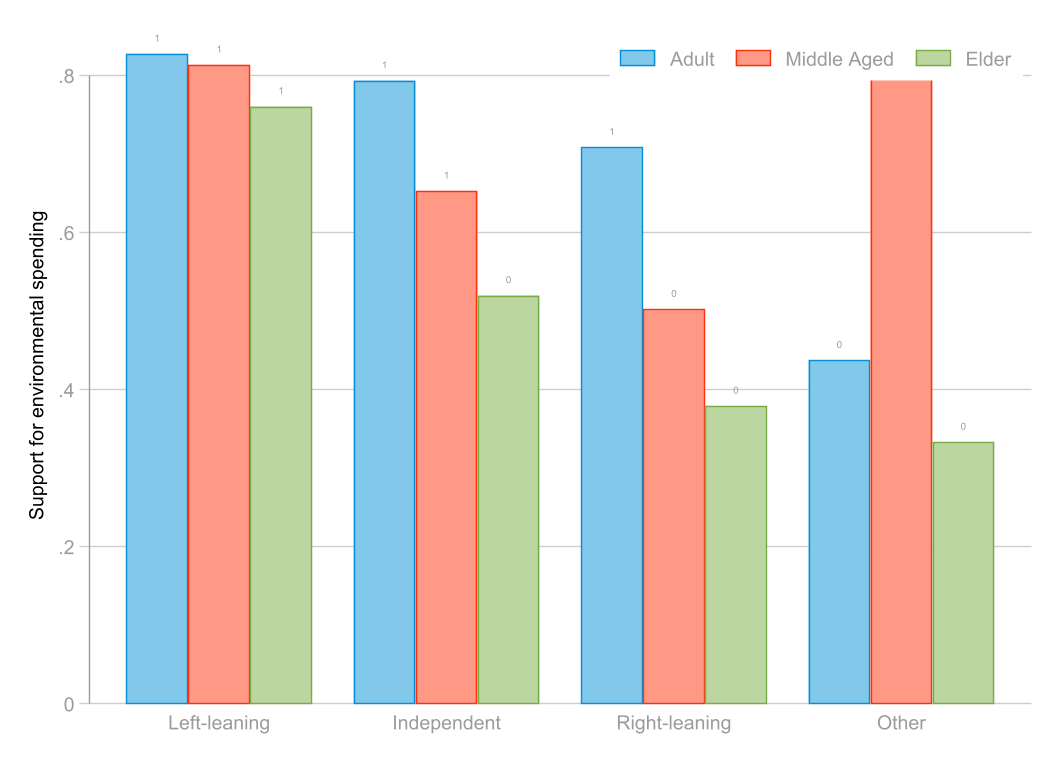

In [19]:
graph bar envspend, over(agerange) over(partygrps) asyvars ytitle (Support for environmental spending) ///
  blabel(bar, format(%7.0fc)) legend(rows(1) position(1) ring(0)) scheme(538w)


Variables that uniquely identify margins: partygrps agerange


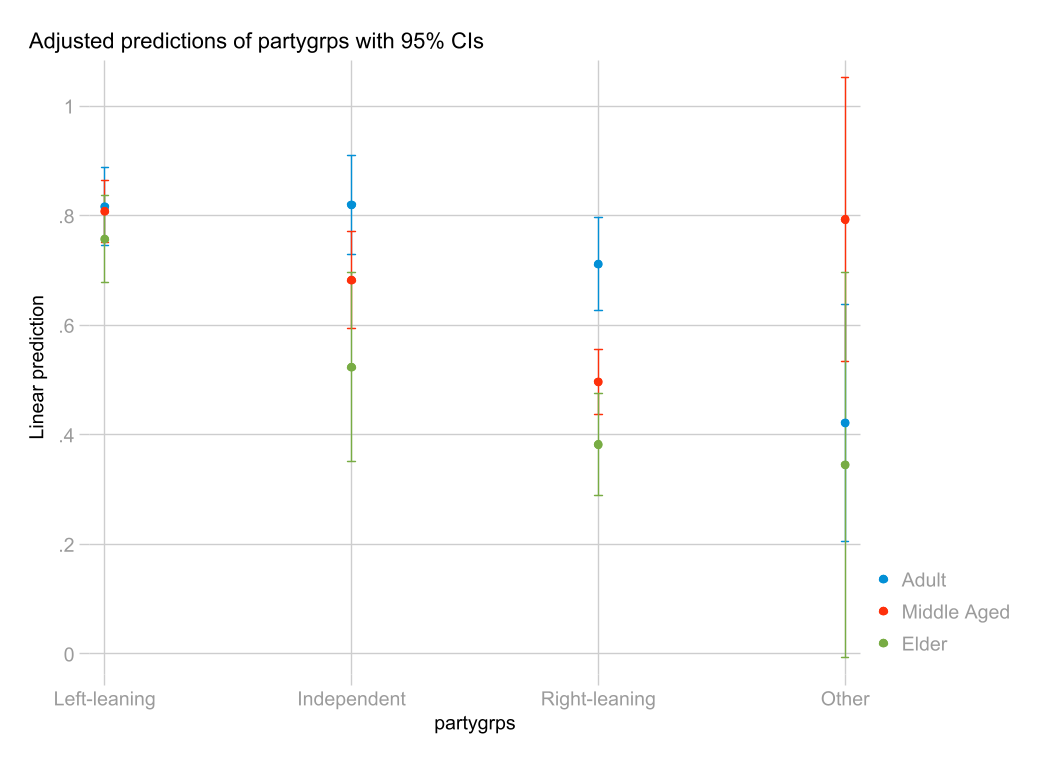

In [20]:
quietly margins partygrps, over(agerange) atmeans
marginsplot, recast(scatter) scheme(538w)

    A. Do the results support or contradict each of your hypotheses?

***H1: Within the standard model, I expect that support for environmental spending will be:***
- ***positively associated with education***
- ***greater for left-leaning respondents in comparison to other political categories***
- ***lower for older respondents.***

## - As predicted, there is a positive association between education and support for environmental spending. Each additional year of schooling is associated with a small increase in the average (?) value for the environmental dummy variable. 

## - Left-leaning respondents are associated with a higher value in the IV in comparison to all other categories of the political leaning variable. 

## - Older respondents are less likely than young adult respondents to support increased environmental spending 

***H1a: Age will have a weak but positive association with support for environmental spending***

## - Older respondents are less likely than young adult respondents to support increased environmental spending 

***H1b: Left-leaning respondents will generally be more supportive of environmental spending than right-leaning respondents***

## -  Left-leaning respondents are associated with a higher value in the IV in comparison to all other categories of the political leaning variable. 

***H1i: Younger generations of right-leaning respondents will have different levels of support for environmental spending than other age groups, more similar to left-leaning respondents.***

## - My hypothesis about younger adult right-leaning respondents appears to be partially supported. Right-leaning young adults seem to be meaningfully more supportive of environmental spending, but not quite at a comparable level to left-leaning respondents. 

    B. Why do the regression coefficients support or contradict your hypotheses?
## H1: 
- Education has a coefficient of .019 and a p-value of 0.000 (according to the model), so it is positive and statistically significant
- All political leanings other than left- show a lesser association with the IV, with right-leaning respondents showing an average of .270 less support (P < .001).
- Similarly, elder respondents are associated with a .187 average level of lesser support in comparison to young adult respondents.

## H1i: Looking specifically at right-leaning respondents, both middle aged and elder respondents are associated with considerably (-.207 and -.271) less support for environmental spending in comparison to young adult, right-leaning respondents. This suggests that These effects both have moderate statistical significance as well (P<.01). 

## This is mostly consistent with my initial look at theory in that right-leaning respondents are consistently less supportive of environmental spending. However, the margin estimates discussed below suggest that age does somewhat matter. 

    C. Why do your regression adjusted estimates from margins for nominal categories or given interval-ratio values support or contradict your hypotheses?
    
## H1i: The margins results show that younger age generally results in greater support in all political categories, except for 'other'. However, this effect is mininal for left-leaning respondents - who are nearly 'in agreement' in terms of average level of support - and it is more pronounced for right-leaning respondents than any other group. In other words, the gap between young adult, right-leaning respondents and middle aged/elder, right-leaning respondents seems to be greater than for other political categories. Thus, the interaction between age and political leaning does not radically contradict what we would expect from theory, but does seem to matter.